In [1]:
import traceback
import pandas as pd
import numpy as np
import gc4eptn
from gc4eptn.dataloaders import (
    PMUDataMatpowerCase9,
    NovicePMUDataMatpowerCase9,
    IntermediatePMUDataMatpowerCase9,
    PMUDataMatpowerCase14,
    NovicePMUDataMatpowerCase14,
    IntermediatePMUDataMatpowerCase14,
)
from gc4eptn.utils.plotting import plot_ground_truth
%load_ext autoreload
%autoreload 2

In [2]:
def print_pmuds_vars(pmuds):
    print(f'nodes: {pmuds.n_nodes}')
    print(f'edges: {pmuds.edges}',)
    print(f'PMUs: {pmuds.n_pmus}',)
    print(f'features:\n{pmuds.nodes}\n{pmuds.n_features}', )

def print_pmuds_info(pmuds):
    print_pmuds_vars(pmuds)
    print(f"Transmission:\n{pmuds.transmission}")
    print(f"Generators:\n{pmuds.generators}")
    print(f"Transformers:\n{pmuds.transformers}")
    print(f"Distribution:\n{pmuds.distribution}")

def checks(n_nodes, edges, n_features):
    assert pmuds.n_nodes == n_nodes
    assert pmuds.edges == edges
    assert sum(pmuds.n_features) == n_features

In [3]:
def check_flow_direction(pmuds):
    incorrect = 0
    for r, row in enumerate(pmuds.true_flow_graph):
        for c, col in enumerate(row):
            if col == 0:
                continue
            A = f'BUS{r+1}(?!\d).*_ang'
            B = f'BUS{c+1}(?!\d).*_ang'
    
            A, B = pmuds.filter(pmuds.df, [A, B])
            
            A_data = pmuds.df[A][0]
            B_data = pmuds.df[B][0]
            if A_data > B_data:
                print(f"{A_data:.3f} > {B_data:.3f}:  {r} -> {c} or {r+1} -> {c+1}")
            elif A_data < B_data:
                incorrect += 1
                print(f"{A_data:.3f} < {B_data:.3f}: {c} -> {r} or {c+1} -> {r+1}")
            else:
                print(f"{A_data:.3f} == {B_data:.3f}: {c} == {r} or {c+1} == {r+1}")
                raise ValueError()
    print(f"Incorrect Directions: {incorrect}")


# Case9

There are no currents thus edges and PMUs can not be counted properly. 

In [4]:
pmuds = PMUDataMatpowerCase9(load='80-120')
pmuds.load_data()
print_pmuds_info(pmuds)
display(pmuds.df)

pmuds.build_graph_data()
display(pmuds.graph_df)

nodes: 9
edges: 0
PMUs: 0
features:
['BUS1' 'BUS2' 'BUS3' 'BUS4' 'BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9']
[2 2 2 2 2 2 2 2 2]
Transmission:
['BUS4_01_V_ang' 'BUS4_01_V_mag' 'BUS5_01_V_ang' 'BUS5_01_V_mag'
 'BUS6_01_V_ang' 'BUS6_01_V_mag' 'BUS7_01_V_ang' 'BUS7_01_V_mag'
 'BUS8_01_V_ang' 'BUS8_01_V_mag' 'BUS9_01_V_ang' 'BUS9_01_V_mag']
Generators:
['BUS1_01_V_mag' 'BUS1_01_V_ang' 'BUS2_01_V_mag' 'BUS2_01_V_ang'
 'BUS3_01_V_mag' 'BUS3_01_V_ang']
Transformers:
[]
Distribution:
[]


,Load Scales,BUS1_01_V_mag,BUS1_01_V_ang,BUS2_01_V_mag,BUS2_01_V_ang,BUS3_01_V_mag,BUS3_01_V_ang,BUS4_01_V_mag,BUS4_01_V_ang,BUS5_01_V_mag,BUS5_01_V_ang,BUS6_01_V_mag,BUS6_01_V_ang,BUS7_01_V_mag,BUS7_01_V_ang,BUS8_01_V_mag,BUS8_01_V_ang,BUS9_01_V_mag,BUS9_01_V_ang
0,0.800092,1.04,0,1.025,0.238348,1.025,0.155909,1.030240,-0.004914,1.022397,-0.006124,1.037096,0.109035,1.025578,0.096858,1.031523,0.141845,1.007433,-0.007424
1,0.800130,1.04,0,1.025,0.238334,1.025,0.155895,1.030239,-0.004920,1.022395,-0.006135,1.037095,0.109021,1.025576,0.096843,1.031522,0.141831,1.007431,-0.007436
2,0.800137,1.04,0,1.025,0.238331,1.025,0.155893,1.030239,-0.004921,1.022395,-0.006137,1.037095,0.109019,1.025576,0.096840,1.031521,0.141829,1.007431,-0.007438
3,0.800209,1.04,0,1.025,0.238304,1.025,0.155866,1.030238,-0.004933,1.022392,-0.006158,1.037093,0.108992,1.025573,0.096810,1.031519,0.141801,1.007427,-0.007460
4,0.800263,1.04,0,1.025,0.238284,1.025,0.155846,1.030237,-0.004943,1.022389,-0.006173,1.037092,0.108972,1.025570,0.096787,1.031518,0.141781,1.007424,-0.007477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.199732,1.04,0,1.025,0.082922,1.025,0.004201,1.018768,-0.073363,1.000169,-0.124676,1.026679,-0.043149,1.004997,-0.074567,1.018971,-0.014773,0.980783,-0.134136
4996,1.199791,1.04,0,1.025,0.082898,1.025,0.004177,1.018766,-0.073374,1.000165,-0.124694,1.026677,-0.043173,1.004994,-0.074594,1.018969,-0.014797,0.980778,-0.134155
4997,1.199797,1.04,0,1.025,0.082896,1.025,0.004175,1.018765,-0.073375,1.000164,-0.124696,1.026677,-0.043175,1.004994,-0.074596,1.018969,-0.014799,0.980777,-0.134157
4998,1.199909,1.04,0,1.025,0.082851,1.025,0.004131,1.018761,-0.073395,1.000156,-0.124731,1.026673,-0.043220,1.004987,-0.074646,1.018965,-0.014845,0.980768,-0.134194


,01_V_mag_0.800092426079767,01_V_ang_0.800092426079767,01_V_mag_0.800130438536048,01_V_ang_0.800130438536048,01_V_mag_0.800136584887256,01_V_ang_0.800136584887256,01_V_mag_0.800208950142778,01_V_ang_0.800208950142778,01_V_mag_0.800263467034445,01_V_ang_0.800263467034445,...,01_V_mag_1.19973179161029,01_V_ang_1.19973179161029,01_V_mag_1.19979114345436,01_V_ang_1.19979114345436,01_V_mag_1.19979664803908,01_V_ang_1.19979664803908,01_V_mag_1.1999092490779,01_V_ang_1.1999092490779,01_V_mag_1.1999170257779,01_V_ang_1.1999170257779
BUS1,1.040000,0.000000,1.040000,0.000000,1.040000,0.000000,1.040000,0.000000,1.040000,0.000000,...,1.040000,0.000000,1.040000,0.000000,1.040000,0.000000,1.040000,0.000000,1.040000,0.000000
BUS2,1.025000,0.238348,1.025000,0.238334,1.025000,0.238331,1.025000,0.238304,1.025000,0.238284,...,1.025000,0.082922,1.025000,0.082898,1.025000,0.082896,1.025000,0.082851,1.025000,0.082848
BUS3,1.025000,0.155909,1.025000,0.155895,1.025000,0.155893,1.025000,0.155866,1.025000,0.155846,...,1.025000,0.004201,1.025000,0.004177,1.025000,0.004175,1.025000,0.004131,1.025000,0.004128
BUS4,1.030240,-0.004914,1.030239,-0.004920,1.030239,-0.004921,1.030238,-0.004933,1.030237,-0.004943,...,1.018768,-0.073363,1.018766,-0.073374,1.018765,-0.073375,1.018761,-0.073395,1.018760,-0.073396
BUS5,1.022397,-0.006124,1.022395,-0.006135,1.022395,-0.006137,1.022392,-0.006158,1.022389,-0.006173,...,1.000169,-0.124676,1.000165,-0.124694,1.000164,-0.124696,1.000156,-0.124731,1.000156,-0.124733
BUS6,1.037096,0.109035,1.037095,0.109021,1.037095,0.109019,1.037093,0.108992,1.037092,0.108972,...,1.026679,-0.043149,1.026677,-0.043173,1.026677,-0.043175,1.026673,-0.043220,1.026673,-0.043223
BUS7,1.025578,0.096858,1.025576,0.096843,1.025576,0.096840,1.025573,0.096810,1.025570,0.096787,...,1.004997,-0.074567,1.004994,-0.074594,1.004994,-0.074596,1.004987,-0.074646,1.004987,-0.074650
BUS8,1.031523,0.141845,1.031522,0.141831,1.031521,0.141829,1.031519,0.141801,1.031518,0.141781,...,1.018971,-0.014773,1.018969,-0.014797,1.018969,-0.014799,1.018965,-0.014845,1.018964,-0.014848
BUS9,1.007433,-0.007424,1.007431,-0.007436,1.007431,-0.007438,1.007427,-0.007460,1.007424,-0.007477,...,0.980783,-0.134136,0.980778,-0.134155,0.980777,-0.134157,0.980768,-0.134194,0.980767,-0.134197


In [5]:
pmuds.node_info

{'BUS1': {'ins': nan,
  'n_ins': nan,
  'unknown': nan,
  'n_unknown': nan,
  'outs': nan,
  'n_outs': nan,
  'features': array(['BUS1_01_V_mag', 'BUS1_01_V_ang'], dtype=object),
  'current': array([], dtype=float64),
  'voltage': array(['BUS1_01_V_mag', 'BUS1_01_V_ang'], dtype='<U13'),
  'edges': nan},
 'BUS2': {'ins': nan,
  'n_ins': nan,
  'unknown': nan,
  'n_unknown': nan,
  'outs': nan,
  'n_outs': nan,
  'features': array(['BUS2_01_V_mag', 'BUS2_01_V_ang'], dtype=object),
  'current': array([], dtype=float64),
  'voltage': array(['BUS2_01_V_mag', 'BUS2_01_V_ang'], dtype='<U13'),
  'edges': nan},
 'BUS3': {'ins': nan,
  'n_ins': nan,
  'unknown': nan,
  'n_unknown': nan,
  'outs': nan,
  'n_outs': nan,
  'features': array(['BUS3_01_V_mag', 'BUS3_01_V_ang'], dtype=object),
  'current': array([], dtype=float64),
  'voltage': array(['BUS3_01_V_mag', 'BUS3_01_V_ang'], dtype='<U13'),
  'edges': nan},
 'BUS4': {'ins': nan,
  'n_ins': nan,
  'unknown': nan,
  'n_unknown': nan,
  'outs':

In [6]:
try:
    pmuds.pu_norm()
except NotImplementedError as e:
    print(e)

MatPower Data is already in PU format. This method is therefore not implemented.


In [7]:
pmuds = PMUDataMatpowerCase9(load='80-90')
pmuds.load_data()
print_pmuds_info(pmuds)
display(pmuds.df)

pmuds.build_graph_data()
display(pmuds.graph_df)

nodes: 9
edges: 0
PMUs: 0
features:
['BUS1' 'BUS2' 'BUS3' 'BUS4' 'BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9']
[2 2 2 2 2 2 2 2 2]
Transmission:
['BUS4_01_V_ang' 'BUS4_01_V_mag' 'BUS5_01_V_ang' 'BUS5_01_V_mag'
 'BUS6_01_V_ang' 'BUS6_01_V_mag' 'BUS7_01_V_ang' 'BUS7_01_V_mag'
 'BUS8_01_V_ang' 'BUS8_01_V_mag' 'BUS9_01_V_ang' 'BUS9_01_V_mag']
Generators:
['BUS1_01_V_mag' 'BUS1_01_V_ang' 'BUS2_01_V_mag' 'BUS2_01_V_ang'
 'BUS3_01_V_mag' 'BUS3_01_V_ang']
Transformers:
[]
Distribution:
[]


,Load Scales,BUS1_01_V_mag,BUS1_01_V_ang,BUS2_01_V_mag,BUS2_01_V_ang,BUS3_01_V_mag,BUS3_01_V_ang,BUS4_01_V_mag,BUS4_01_V_ang,BUS5_01_V_mag,BUS5_01_V_ang,BUS6_01_V_mag,BUS6_01_V_ang,BUS7_01_V_mag,BUS7_01_V_ang,BUS8_01_V_mag,BUS8_01_V_ang,BUS9_01_V_mag,BUS9_01_V_ang
0,0.800023,1.04,0,1.025,0.238374,1.025,0.155934,1.030241,-0.004902,1.022399,-0.006104,1.037097,0.109060,1.025581,0.096887,1.031524,0.141872,1.007436,-0.007403
1,0.800033,1.04,0,1.025,0.238371,1.025,0.155931,1.030241,-0.004904,1.022399,-0.006107,1.037097,0.109057,1.025581,0.096883,1.031524,0.141868,1.007436,-0.007406
2,0.800034,1.04,0,1.025,0.238370,1.025,0.155930,1.030241,-0.004904,1.022399,-0.006107,1.037097,0.109056,1.025581,0.096883,1.031524,0.141868,1.007436,-0.007406
3,0.800052,1.04,0,1.025,0.238363,1.025,0.155924,1.030240,-0.004907,1.022398,-0.006113,1.037097,0.109050,1.025580,0.096875,1.031524,0.141861,1.007435,-0.007412
4,0.800066,1.04,0,1.025,0.238358,1.025,0.155919,1.030240,-0.004910,1.022398,-0.006117,1.037096,0.109045,1.025579,0.096869,1.031523,0.141856,1.007434,-0.007416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.899933,1.04,0,1.025,0.200473,1.025,0.118985,1.028320,-0.021690,1.017853,-0.034994,1.034837,0.072008,1.020876,0.055150,1.028772,0.103712,1.001895,-0.038248
4996,0.899948,1.04,0,1.025,0.200468,1.025,0.118979,1.028320,-0.021692,1.017853,-0.034998,1.034836,0.072003,1.020875,0.055143,1.028772,0.103706,1.001894,-0.038252
4997,0.899949,1.04,0,1.025,0.200467,1.025,0.118979,1.028320,-0.021692,1.017853,-0.034998,1.034836,0.072002,1.020875,0.055143,1.028772,0.103706,1.001894,-0.038253
4998,0.899977,1.04,0,1.025,0.200457,1.025,0.118968,1.028319,-0.021697,1.017851,-0.035007,1.034836,0.071992,1.020874,0.055131,1.028771,0.103695,1.001893,-0.038261


,01_V_mag_0.800023106519942,01_V_ang_0.800023106519942,01_V_mag_0.800032609634012,01_V_ang_0.800032609634012,01_V_mag_0.800034146221814,01_V_ang_0.800034146221814,01_V_mag_0.800052237535695,01_V_ang_0.800052237535695,01_V_mag_0.800065866758611,01_V_ang_0.800065866758611,...,01_V_mag_0.899932947902572,01_V_ang_0.899932947902572,01_V_mag_0.899947785863589,01_V_ang_0.899947785863589,01_V_mag_0.89994916200977,01_V_ang_0.89994916200977,01_V_mag_0.899977312269476,01_V_ang_0.899977312269476,01_V_mag_0.899979256444475,01_V_ang_0.899979256444475
BUS1,1.040000,0.000000,1.040000,0.000000,1.040000,0.000000,1.040000,0.000000,1.040000,0.000000,...,1.040000,0.000000,1.040000,0.000000,1.040000,0.000000,1.040000,0.000000,1.040000,0.000000
BUS2,1.025000,0.238374,1.025000,0.238371,1.025000,0.238370,1.025000,0.238363,1.025000,0.238358,...,1.025000,0.200473,1.025000,0.200468,1.025000,0.200467,1.025000,0.200457,1.025000,0.200456
BUS3,1.025000,0.155934,1.025000,0.155931,1.025000,0.155930,1.025000,0.155924,1.025000,0.155919,...,1.025000,0.118985,1.025000,0.118979,1.025000,0.118979,1.025000,0.118968,1.025000,0.118968
BUS4,1.030241,-0.004902,1.030241,-0.004904,1.030241,-0.004904,1.030240,-0.004907,1.030240,-0.004910,...,1.028320,-0.021690,1.028320,-0.021692,1.028320,-0.021692,1.028319,-0.021697,1.028319,-0.021697
BUS5,1.022399,-0.006104,1.022399,-0.006107,1.022399,-0.006107,1.022398,-0.006113,1.022398,-0.006117,...,1.017853,-0.034994,1.017853,-0.034998,1.017853,-0.034998,1.017851,-0.035007,1.017851,-0.035007
BUS6,1.037097,0.109060,1.037097,0.109057,1.037097,0.109056,1.037097,0.109050,1.037096,0.109045,...,1.034837,0.072008,1.034836,0.072003,1.034836,0.072002,1.034836,0.071992,1.034836,0.071991
BUS7,1.025581,0.096887,1.025581,0.096883,1.025581,0.096883,1.025580,0.096875,1.025579,0.096869,...,1.020876,0.055150,1.020875,0.055143,1.020875,0.055143,1.020874,0.055131,1.020874,0.055130
BUS8,1.031524,0.141872,1.031524,0.141868,1.031524,0.141868,1.031524,0.141861,1.031523,0.141856,...,1.028772,0.103712,1.028772,0.103706,1.028772,0.103706,1.028771,0.103695,1.028771,0.103694
BUS9,1.007436,-0.007403,1.007436,-0.007406,1.007436,-0.007406,1.007435,-0.007412,1.007434,-0.007416,...,1.001895,-0.038248,1.001894,-0.038252,1.001894,-0.038253,1.001893,-0.038261,1.001892,-0.038262


## Novice

In [15]:
novice_pmuds = NovicePMUDataMatpowerCase9(load='80-120')
novice_pmuds.load_data()
print_pmuds_vars(novice_pmuds)
display(novice_pmuds.df)

novice_pmuds.build_graph_data()
display(novice_pmuds.graph_df)

nodes: 6
edges: 0
PMUs: 0
features:
['BUS4' 'BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9']
[2 2 2 2 2 2]


,Load Scales,BUS4_01_V_mag,BUS4_01_V_ang,BUS5_01_V_mag,BUS5_01_V_ang,BUS6_01_V_mag,BUS6_01_V_ang,BUS7_01_V_mag,BUS7_01_V_ang,BUS8_01_V_mag,BUS8_01_V_ang,BUS9_01_V_mag,BUS9_01_V_ang
0,0.800092,1.030240,-0.004914,1.022397,-0.006124,1.037096,0.109035,1.025578,0.096858,1.031523,0.141845,1.007433,-0.007424
1,0.800130,1.030239,-0.004920,1.022395,-0.006135,1.037095,0.109021,1.025576,0.096843,1.031522,0.141831,1.007431,-0.007436
2,0.800137,1.030239,-0.004921,1.022395,-0.006137,1.037095,0.109019,1.025576,0.096840,1.031521,0.141829,1.007431,-0.007438
3,0.800209,1.030238,-0.004933,1.022392,-0.006158,1.037093,0.108992,1.025573,0.096810,1.031519,0.141801,1.007427,-0.007460
4,0.800263,1.030237,-0.004943,1.022389,-0.006173,1.037092,0.108972,1.025570,0.096787,1.031518,0.141781,1.007424,-0.007477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.199732,1.018768,-0.073363,1.000169,-0.124676,1.026679,-0.043149,1.004997,-0.074567,1.018971,-0.014773,0.980783,-0.134136
4996,1.199791,1.018766,-0.073374,1.000165,-0.124694,1.026677,-0.043173,1.004994,-0.074594,1.018969,-0.014797,0.980778,-0.134155
4997,1.199797,1.018765,-0.073375,1.000164,-0.124696,1.026677,-0.043175,1.004994,-0.074596,1.018969,-0.014799,0.980777,-0.134157
4998,1.199909,1.018761,-0.073395,1.000156,-0.124731,1.026673,-0.043220,1.004987,-0.074646,1.018965,-0.014845,0.980768,-0.134194


,01_V_mag_0.800092426079767,01_V_ang_0.800092426079767,01_V_mag_0.800130438536048,01_V_ang_0.800130438536048,01_V_mag_0.800136584887256,01_V_ang_0.800136584887256,01_V_mag_0.800208950142778,01_V_ang_0.800208950142778,01_V_mag_0.800263467034445,01_V_ang_0.800263467034445,...,01_V_mag_1.19973179161029,01_V_ang_1.19973179161029,01_V_mag_1.19979114345436,01_V_ang_1.19979114345436,01_V_mag_1.19979664803908,01_V_ang_1.19979664803908,01_V_mag_1.1999092490779,01_V_ang_1.1999092490779,01_V_mag_1.1999170257779,01_V_ang_1.1999170257779
BUS4,1.030240,-0.004914,1.030239,-0.004920,1.030239,-0.004921,1.030238,-0.004933,1.030237,-0.004943,...,1.018768,-0.073363,1.018766,-0.073374,1.018765,-0.073375,1.018761,-0.073395,1.018760,-0.073396
BUS5,1.022397,-0.006124,1.022395,-0.006135,1.022395,-0.006137,1.022392,-0.006158,1.022389,-0.006173,...,1.000169,-0.124676,1.000165,-0.124694,1.000164,-0.124696,1.000156,-0.124731,1.000156,-0.124733
BUS6,1.037096,0.109035,1.037095,0.109021,1.037095,0.109019,1.037093,0.108992,1.037092,0.108972,...,1.026679,-0.043149,1.026677,-0.043173,1.026677,-0.043175,1.026673,-0.043220,1.026673,-0.043223
BUS7,1.025578,0.096858,1.025576,0.096843,1.025576,0.096840,1.025573,0.096810,1.025570,0.096787,...,1.004997,-0.074567,1.004994,-0.074594,1.004994,-0.074596,1.004987,-0.074646,1.004987,-0.074650
BUS8,1.031523,0.141845,1.031522,0.141831,1.031521,0.141829,1.031519,0.141801,1.031518,0.141781,...,1.018971,-0.014773,1.018969,-0.014797,1.018969,-0.014799,1.018965,-0.014845,1.018964,-0.014848
BUS9,1.007433,-0.007424,1.007431,-0.007436,1.007431,-0.007438,1.007427,-0.007460,1.007424,-0.007477,...,0.980783,-0.134136,0.980778,-0.134155,0.980777,-0.134157,0.980768,-0.134194,0.980767,-0.134197


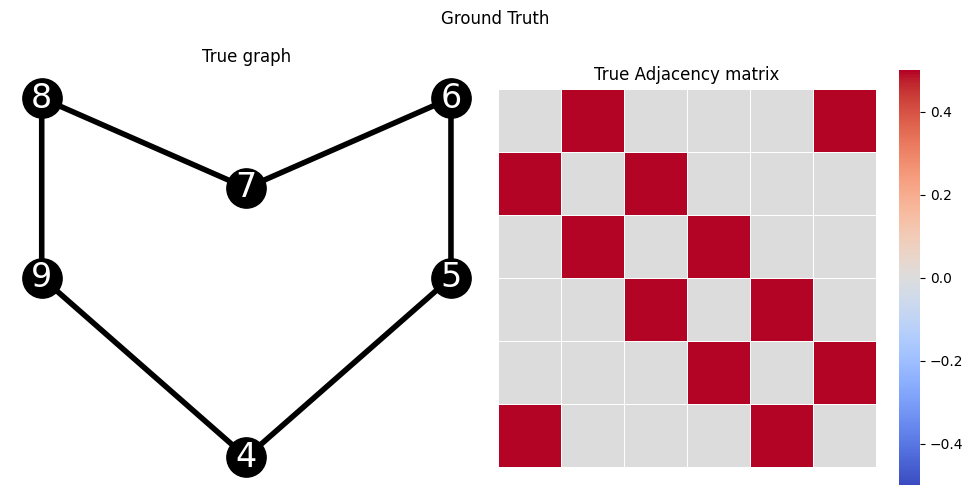

In [16]:
plot_ground_truth(
    A=novice_pmuds.true_network_graph,
    labels=novice_pmuds.labels,
    positions=novice_pmuds.graph_positions,
    annot=False,
    # save_path='case9-novice-network-graph.pdf',
);

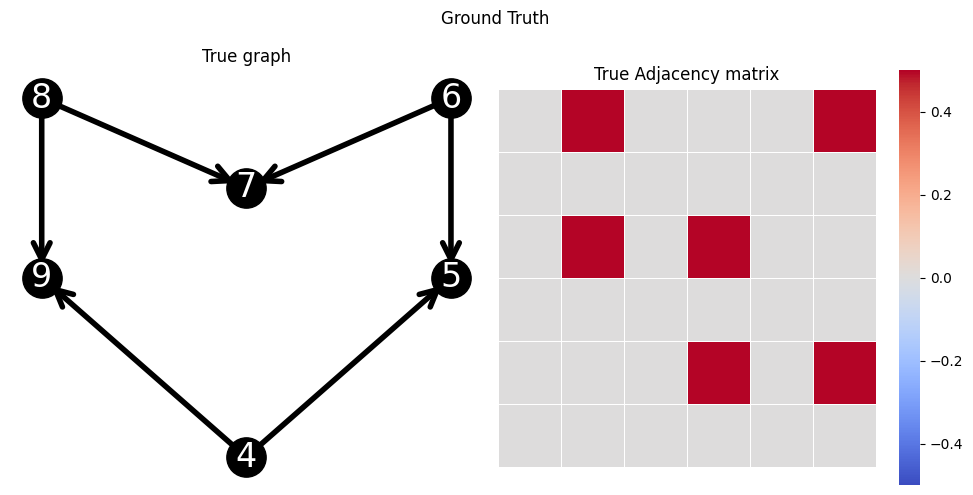

In [17]:
plot_ground_truth(
    A=novice_pmuds.true_flow_graph,
    labels=novice_pmuds.labels,
    positions=novice_pmuds.graph_positions,
    annot=False,
    directed=True,
    # save_path='case9-novice-flow-graph.pdf',
);

## Intermediate 

In [35]:
inter_pmuds = IntermediatePMUDataMatpowerCase9(load='80-120')
inter_pmuds.load_data()
print_pmuds_vars(inter_pmuds)
display(inter_pmuds.df)

inter_pmuds.build_graph_data()
display(inter_pmuds.graph_df)

nodes: 9
edges: 0
PMUs: 0
features:
['BUS1' 'BUS2' 'BUS3' 'BUS4' 'BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9']
[2 2 2 2 2 2 2 2 2]


,Load Scales,BUS1_01_V_mag,BUS1_01_V_ang,BUS2_01_V_mag,BUS2_01_V_ang,BUS3_01_V_mag,BUS3_01_V_ang,BUS4_01_V_mag,BUS4_01_V_ang,BUS5_01_V_mag,BUS5_01_V_ang,BUS6_01_V_mag,BUS6_01_V_ang,BUS7_01_V_mag,BUS7_01_V_ang,BUS8_01_V_mag,BUS8_01_V_ang,BUS9_01_V_mag,BUS9_01_V_ang
0,0.800092,1.04,0,1.025,0.238348,1.025,0.155909,1.030240,-0.004914,1.022397,-0.006124,1.037096,0.109035,1.025578,0.096858,1.031523,0.141845,1.007433,-0.007424
1,0.800130,1.04,0,1.025,0.238334,1.025,0.155895,1.030239,-0.004920,1.022395,-0.006135,1.037095,0.109021,1.025576,0.096843,1.031522,0.141831,1.007431,-0.007436
2,0.800137,1.04,0,1.025,0.238331,1.025,0.155893,1.030239,-0.004921,1.022395,-0.006137,1.037095,0.109019,1.025576,0.096840,1.031521,0.141829,1.007431,-0.007438
3,0.800209,1.04,0,1.025,0.238304,1.025,0.155866,1.030238,-0.004933,1.022392,-0.006158,1.037093,0.108992,1.025573,0.096810,1.031519,0.141801,1.007427,-0.007460
4,0.800263,1.04,0,1.025,0.238284,1.025,0.155846,1.030237,-0.004943,1.022389,-0.006173,1.037092,0.108972,1.025570,0.096787,1.031518,0.141781,1.007424,-0.007477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.199732,1.04,0,1.025,0.082922,1.025,0.004201,1.018768,-0.073363,1.000169,-0.124676,1.026679,-0.043149,1.004997,-0.074567,1.018971,-0.014773,0.980783,-0.134136
4996,1.199791,1.04,0,1.025,0.082898,1.025,0.004177,1.018766,-0.073374,1.000165,-0.124694,1.026677,-0.043173,1.004994,-0.074594,1.018969,-0.014797,0.980778,-0.134155
4997,1.199797,1.04,0,1.025,0.082896,1.025,0.004175,1.018765,-0.073375,1.000164,-0.124696,1.026677,-0.043175,1.004994,-0.074596,1.018969,-0.014799,0.980777,-0.134157
4998,1.199909,1.04,0,1.025,0.082851,1.025,0.004131,1.018761,-0.073395,1.000156,-0.124731,1.026673,-0.043220,1.004987,-0.074646,1.018965,-0.014845,0.980768,-0.134194


,01_V_mag_0.800092426079767,01_V_ang_0.800092426079767,01_V_mag_0.800130438536048,01_V_ang_0.800130438536048,01_V_mag_0.800136584887256,01_V_ang_0.800136584887256,01_V_mag_0.800208950142778,01_V_ang_0.800208950142778,01_V_mag_0.800263467034445,01_V_ang_0.800263467034445,...,01_V_mag_1.19973179161029,01_V_ang_1.19973179161029,01_V_mag_1.19979114345436,01_V_ang_1.19979114345436,01_V_mag_1.19979664803908,01_V_ang_1.19979664803908,01_V_mag_1.1999092490779,01_V_ang_1.1999092490779,01_V_mag_1.1999170257779,01_V_ang_1.1999170257779
BUS1,1.040000,0.000000,1.040000,0.000000,1.040000,0.000000,1.040000,0.000000,1.040000,0.000000,...,1.040000,0.000000,1.040000,0.000000,1.040000,0.000000,1.040000,0.000000,1.040000,0.000000
BUS2,1.025000,0.238348,1.025000,0.238334,1.025000,0.238331,1.025000,0.238304,1.025000,0.238284,...,1.025000,0.082922,1.025000,0.082898,1.025000,0.082896,1.025000,0.082851,1.025000,0.082848
BUS3,1.025000,0.155909,1.025000,0.155895,1.025000,0.155893,1.025000,0.155866,1.025000,0.155846,...,1.025000,0.004201,1.025000,0.004177,1.025000,0.004175,1.025000,0.004131,1.025000,0.004128
BUS4,1.030240,-0.004914,1.030239,-0.004920,1.030239,-0.004921,1.030238,-0.004933,1.030237,-0.004943,...,1.018768,-0.073363,1.018766,-0.073374,1.018765,-0.073375,1.018761,-0.073395,1.018760,-0.073396
BUS5,1.022397,-0.006124,1.022395,-0.006135,1.022395,-0.006137,1.022392,-0.006158,1.022389,-0.006173,...,1.000169,-0.124676,1.000165,-0.124694,1.000164,-0.124696,1.000156,-0.124731,1.000156,-0.124733
BUS6,1.037096,0.109035,1.037095,0.109021,1.037095,0.109019,1.037093,0.108992,1.037092,0.108972,...,1.026679,-0.043149,1.026677,-0.043173,1.026677,-0.043175,1.026673,-0.043220,1.026673,-0.043223
BUS7,1.025578,0.096858,1.025576,0.096843,1.025576,0.096840,1.025573,0.096810,1.025570,0.096787,...,1.004997,-0.074567,1.004994,-0.074594,1.004994,-0.074596,1.004987,-0.074646,1.004987,-0.074650
BUS8,1.031523,0.141845,1.031522,0.141831,1.031521,0.141829,1.031519,0.141801,1.031518,0.141781,...,1.018971,-0.014773,1.018969,-0.014797,1.018969,-0.014799,1.018965,-0.014845,1.018964,-0.014848
BUS9,1.007433,-0.007424,1.007431,-0.007436,1.007431,-0.007438,1.007427,-0.007460,1.007424,-0.007477,...,0.980783,-0.134136,0.980778,-0.134155,0.980777,-0.134157,0.980768,-0.134194,0.980767,-0.134197


In [36]:
check_flow_direction(inter_pmuds)

0.000 > -0.005:  0 -> 3 or 1 -> 4
0.238 > 0.142:  1 -> 7 or 2 -> 8
0.156 > 0.109:  2 -> 5 or 3 -> 6
-0.005 > -0.006:  3 -> 4 or 4 -> 5
-0.005 > -0.007:  3 -> 8 or 4 -> 9
0.109 > -0.006:  5 -> 4 or 6 -> 5
0.109 > 0.097:  5 -> 6 or 6 -> 7
0.142 > 0.097:  7 -> 6 or 8 -> 7
0.142 > -0.007:  7 -> 8 or 8 -> 9
Incorrect Directions: 0


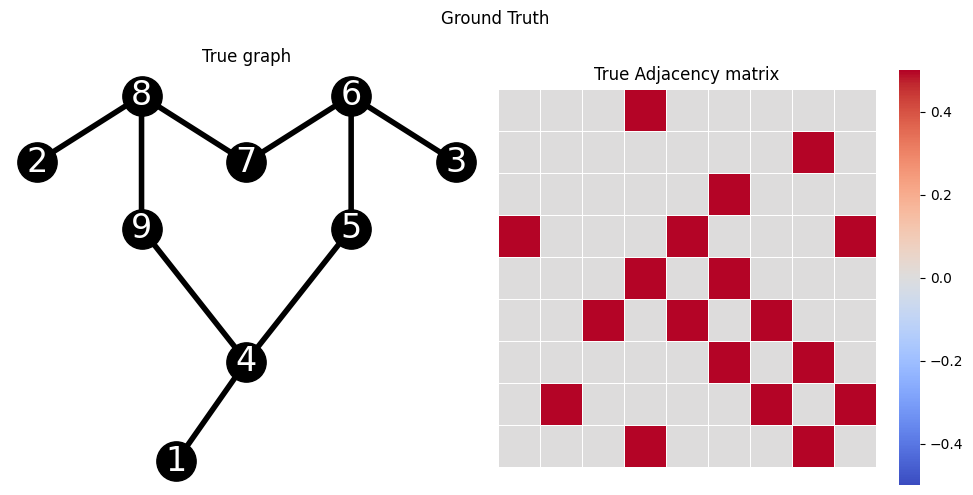

In [37]:
plot_ground_truth(
    A=inter_pmuds.true_network_graph,
    labels=inter_pmuds.labels,
    positions=inter_pmuds.graph_positions,
    annot=False,
    # save_path='case9-intermediate-network-graph.pdf',
);

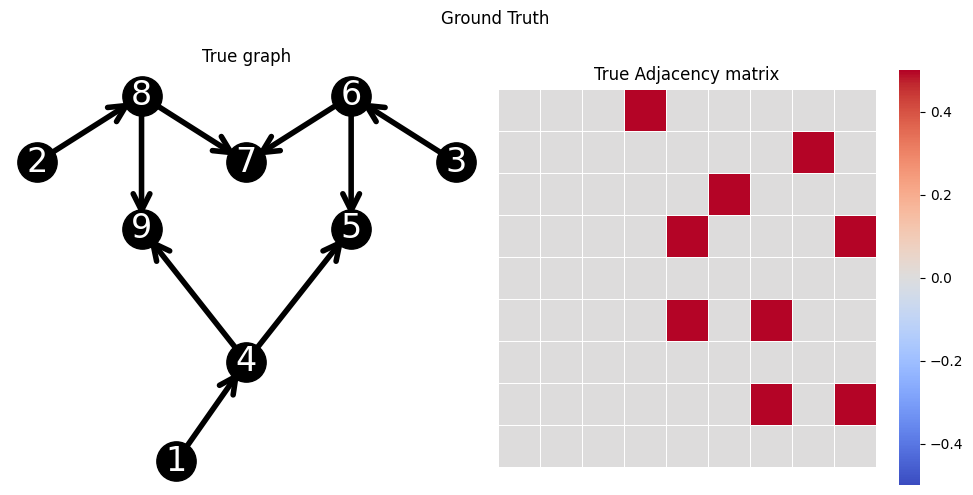

In [38]:
plot_ground_truth(
    A=inter_pmuds.true_flow_graph,
    labels=inter_pmuds.labels,
    positions=inter_pmuds.graph_positions,
    annot=False,
    directed=True,
    # save_path='case9-intermediate-flow-graph.pdf',
);

# Case14

In [39]:
pmuds = PMUDataMatpowerCase14( load='80-120')
pmuds.load_data()
print_pmuds_info(pmuds)
display(pmuds.df)

pmuds.build_graph_data()
display(pmuds.graph_df)

nodes: 14
edges: 0
PMUs: 0
features:
['BUS1' 'BUS2' 'BUS3' 'BUS4' 'BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10'
 'BUS11' 'BUS12' 'BUS13' 'BUS14']
[2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Transmission:
['BUS10_01_V_ang' 'BUS10_01_V_mag' 'BUS11_01_V_ang' 'BUS11_01_V_mag'
 'BUS12_01_V_ang' 'BUS12_01_V_mag' 'BUS13_01_V_ang' 'BUS13_01_V_mag'
 'BUS14_01_V_ang' 'BUS14_01_V_mag' 'BUS4_01_V_ang' 'BUS4_01_V_mag'
 'BUS5_01_V_ang' 'BUS5_01_V_mag' 'BUS7_01_V_ang' 'BUS7_01_V_mag'
 'BUS9_01_V_ang' 'BUS9_01_V_mag']
Generators:
['BUS1_01_V_mag' 'BUS1_01_V_ang' 'BUS2_01_V_mag' 'BUS2_01_V_ang'
 'BUS3_01_V_mag' 'BUS3_01_V_ang' 'BUS6_01_V_mag' 'BUS6_01_V_ang'
 'BUS8_01_V_mag' 'BUS8_01_V_ang']
Transformers:
[]
Distribution:
[]


,Load Scales,BUS1_01_V_mag,BUS1_01_V_ang,BUS2_01_V_mag,BUS2_01_V_ang,BUS3_01_V_mag,BUS3_01_V_ang,BUS4_01_V_mag,BUS4_01_V_ang,BUS5_01_V_mag,...,BUS10_01_V_mag,BUS10_01_V_ang,BUS11_01_V_mag,BUS11_01_V_ang,BUS12_01_V_mag,BUS12_01_V_ang,BUS13_01_V_mag,BUS13_01_V_ang,BUS14_01_V_mag,BUS14_01_V_ang
0,0.800028,1.060000,0,1.041324,-0.065882,1.014407,-0.174033,1.017968,-0.139937,1.019692,...,1.046410,-0.207573,1.050342,-0.203100,1.048259,-0.206955,1.044554,-0.208155,1.033659,-0.220663
1,0.800036,1.060000,0,1.041324,-0.065883,1.014407,-0.174034,1.017968,-0.139938,1.019691,...,1.046410,-0.207575,1.050341,-0.203102,1.048259,-0.206957,1.044554,-0.208158,1.033658,-0.220665
2,0.800104,1.060000,0,1.041322,-0.065889,1.014404,-0.174050,1.017965,-0.139951,1.019689,...,1.046407,-0.207594,1.050339,-0.203120,1.048257,-0.206976,1.044552,-0.208177,1.033654,-0.220685
3,0.800146,1.060000,0,1.041322,-0.065892,1.014402,-0.174060,1.017963,-0.139959,1.019687,...,1.046405,-0.207606,1.050338,-0.203132,1.048257,-0.206988,1.044551,-0.208189,1.033652,-0.220698
4,0.800278,1.060000,0,1.041319,-0.065904,1.014396,-0.174091,1.017957,-0.139984,1.019682,...,1.046398,-0.207642,1.050334,-0.203167,1.048254,-0.207025,1.044547,-0.208226,1.033644,-0.220736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.199370,1.059999,0,1.040455,-0.071934,1.015763,-0.174224,1.013581,-0.152692,1.015623,...,1.032348,-0.229584,1.041897,-0.228344,1.041412,-0.239235,1.035368,-0.239931,1.014400,-0.252553
4996,1.199437,1.059999,0,1.040455,-0.071934,1.015762,-0.174225,1.013581,-0.152693,1.015623,...,1.032346,-0.229582,1.041896,-0.228342,1.041411,-0.239234,1.035366,-0.239930,1.014397,-0.252553
4997,1.199438,1.059999,0,1.040455,-0.071934,1.015762,-0.174225,1.013581,-0.152693,1.015623,...,1.032346,-0.229582,1.041896,-0.228342,1.041411,-0.239234,1.035366,-0.239930,1.014397,-0.252553
4998,1.199575,1.059999,0,1.040455,-0.071935,1.015762,-0.174226,1.013580,-0.152693,1.015623,...,1.032340,-0.229580,1.041893,-0.228339,1.041408,-0.239231,1.035363,-0.239927,1.014390,-0.252552


,01_V_mag_0.800028104260386,01_V_ang_0.800028104260386,01_V_mag_0.800035606393374,01_V_ang_0.800035606393374,01_V_mag_0.800104342068212,01_V_ang_0.800104342068212,01_V_mag_0.800146249505322,01_V_ang_0.800146249505322,01_V_mag_0.800278041588831,01_V_ang_0.800278041588831,...,01_V_mag_1.19937011660256,01_V_ang_1.19937011660256,01_V_mag_1.19943735531037,01_V_ang_1.19943735531037,01_V_mag_1.19943783891731,01_V_ang_1.19943783891731,01_V_mag_1.19957494223415,01_V_ang_1.19957494223415,01_V_mag_1.19986775178598,01_V_ang_1.19986775178598
BUS1,1.060000,0.000000,1.060000,0.000000,1.060000,0.000000,1.060000,0.000000,1.060000,0.000000,...,1.059999,0.000000,1.059999,0.000000,1.059999,0.000000,1.059999,0.000000,1.059999,0.000000
BUS2,1.041324,-0.065882,1.041324,-0.065883,1.041322,-0.065889,1.041322,-0.065892,1.041319,-0.065904,...,1.040455,-0.071934,1.040455,-0.071934,1.040455,-0.071934,1.040455,-0.071935,1.040455,-0.071938
BUS3,1.014407,-0.174033,1.014407,-0.174034,1.014404,-0.174050,1.014402,-0.174060,1.014396,-0.174091,...,1.015763,-0.174224,1.015762,-0.174225,1.015762,-0.174225,1.015762,-0.174226,1.015762,-0.174230
BUS4,1.017968,-0.139937,1.017968,-0.139938,1.017965,-0.139951,1.017963,-0.139959,1.017957,-0.139984,...,1.013581,-0.152692,1.013581,-0.152693,1.013581,-0.152693,1.013580,-0.152693,1.013579,-0.152695
BUS5,1.019692,-0.118632,1.019691,-0.118633,1.019689,-0.118644,1.019687,-0.118651,1.019682,-0.118672,...,1.015623,-0.131223,1.015623,-0.131223,1.015623,-0.131223,1.015623,-0.131223,1.015622,-0.131224
BUS6,1.059999,-0.194833,1.059999,-0.194835,1.059999,-0.194853,1.059999,-0.194864,1.059999,-0.194899,...,1.059994,-0.221765,1.059994,-0.221763,1.059994,-0.221763,1.059994,-0.221758,1.059994,-0.221747
BUS7,1.050657,-0.182966,1.050657,-0.182968,1.050654,-0.182984,1.050653,-0.182994,1.050648,-0.183026,...,1.042802,-0.180627,1.042801,-0.180622,1.042801,-0.180622,1.042798,-0.180612,1.042792,-0.180591
BUS8,1.059998,-0.182966,1.059998,-0.182968,1.059998,-0.182984,1.059998,-0.182994,1.059998,-0.183026,...,1.059995,-0.135918,1.059995,-0.135904,1.059995,-0.135904,1.059995,-0.135875,1.059995,-0.135813
BUS9,1.050744,-0.205384,1.050744,-0.205386,1.050740,-0.205404,1.050738,-0.205416,1.050732,-0.205451,...,1.037286,-0.223844,1.037284,-0.223842,1.037284,-0.223842,1.037278,-0.223839,1.037267,-0.223833
BUS10,1.046410,-0.207573,1.046410,-0.207575,1.046407,-0.207594,1.046405,-0.207606,1.046398,-0.207642,...,1.032348,-0.229584,1.032346,-0.229582,1.032346,-0.229582,1.032340,-0.229580,1.032329,-0.229574


In [40]:
try:
    pmuds.pu_norm()
except NotImplementedError as e:
    print(e)

MatPower Data is already in PU format. This method is therefore not implemented.


In [41]:
pmuds = PMUDataMatpowerCase14(load='80-90')
pmuds.load_data()
print_pmuds_info(pmuds)
display(pmuds.df)

pmuds.build_graph_data()
display(pmuds.graph_df)

nodes: 14
edges: 0
PMUs: 0
features:
['BUS1' 'BUS2' 'BUS3' 'BUS4' 'BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10'
 'BUS11' 'BUS12' 'BUS13' 'BUS14']
[2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Transmission:
['BUS10_01_V_ang' 'BUS10_01_V_mag' 'BUS11_01_V_ang' 'BUS11_01_V_mag'
 'BUS12_01_V_ang' 'BUS12_01_V_mag' 'BUS13_01_V_ang' 'BUS13_01_V_mag'
 'BUS14_01_V_ang' 'BUS14_01_V_mag' 'BUS4_01_V_ang' 'BUS4_01_V_mag'
 'BUS5_01_V_ang' 'BUS5_01_V_mag' 'BUS7_01_V_ang' 'BUS7_01_V_mag'
 'BUS9_01_V_ang' 'BUS9_01_V_mag']
Generators:
['BUS1_01_V_mag' 'BUS1_01_V_ang' 'BUS2_01_V_mag' 'BUS2_01_V_ang'
 'BUS3_01_V_mag' 'BUS3_01_V_ang' 'BUS6_01_V_mag' 'BUS6_01_V_ang'
 'BUS8_01_V_mag' 'BUS8_01_V_ang']
Transformers:
[]
Distribution:
[]


,Load Scales,BUS1_01_V_mag,BUS1_01_V_ang,BUS2_01_V_mag,BUS2_01_V_ang,BUS3_01_V_mag,BUS3_01_V_ang,BUS4_01_V_mag,BUS4_01_V_ang,BUS5_01_V_mag,...,BUS10_01_V_mag,BUS10_01_V_ang,BUS11_01_V_mag,BUS11_01_V_ang,BUS12_01_V_mag,BUS12_01_V_ang,BUS13_01_V_mag,BUS13_01_V_ang,BUS14_01_V_mag,BUS14_01_V_ang
0,0.800023,1.06,0,1.041324,-0.065881,1.014407,-0.174031,1.017969,-0.139936,1.019692,...,1.046411,-0.207572,1.050342,-0.203098,1.048259,-0.206953,1.044554,-0.208154,1.033659,-0.220662
1,0.800033,1.06,0,1.041324,-0.065882,1.014407,-0.174034,1.017968,-0.139938,1.019692,...,1.046410,-0.207574,1.050341,-0.203101,1.048259,-0.206956,1.044554,-0.208157,1.033658,-0.220664
2,0.800034,1.06,0,1.041324,-0.065882,1.014407,-0.174034,1.017968,-0.139938,1.019692,...,1.046410,-0.207575,1.050341,-0.203101,1.048259,-0.206956,1.044554,-0.208157,1.033658,-0.220665
3,0.800052,1.06,0,1.041323,-0.065884,1.014406,-0.174038,1.017967,-0.139942,1.019691,...,1.046409,-0.207580,1.050341,-0.203106,1.048258,-0.206961,1.044553,-0.208162,1.033657,-0.220670
4,0.800066,1.06,0,1.041323,-0.065885,1.014405,-0.174041,1.017967,-0.139944,1.019690,...,1.046409,-0.207584,1.050340,-0.203110,1.048258,-0.206965,1.044553,-0.208166,1.033657,-0.220674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.899933,1.06,0,1.040870,-0.069066,1.014807,-0.175072,1.015337,-0.148668,1.017339,...,1.042131,-0.225627,1.047818,-0.221199,1.046510,-0.226178,1.042123,-0.227370,1.028296,-0.240796
4996,0.899948,1.06,0,1.040870,-0.069067,1.014807,-0.175072,1.015337,-0.148669,1.017339,...,1.042130,-0.225630,1.047818,-0.221202,1.046510,-0.226181,1.042122,-0.227372,1.028296,-0.240798
4997,0.899949,1.06,0,1.040870,-0.069067,1.014807,-0.175072,1.015337,-0.148669,1.017339,...,1.042130,-0.225630,1.047818,-0.221202,1.046510,-0.226181,1.042122,-0.227373,1.028295,-0.240799
4998,0.899977,1.06,0,1.040870,-0.069067,1.014808,-0.175070,1.015336,-0.148671,1.017338,...,1.042129,-0.225634,1.047817,-0.221206,1.046509,-0.226186,1.042122,-0.227377,1.028294,-0.240804


,01_V_mag_0.800023106519942,01_V_ang_0.800023106519942,01_V_mag_0.800032609634012,01_V_ang_0.800032609634012,01_V_mag_0.800034146221814,01_V_ang_0.800034146221814,01_V_mag_0.800052237535695,01_V_ang_0.800052237535695,01_V_mag_0.800065866758611,01_V_ang_0.800065866758611,...,01_V_mag_0.899932947902572,01_V_ang_0.899932947902572,01_V_mag_0.899947785863589,01_V_ang_0.899947785863589,01_V_mag_0.89994916200977,01_V_ang_0.89994916200977,01_V_mag_0.899977312269476,01_V_ang_0.899977312269476,01_V_mag_0.899979256444475,01_V_ang_0.899979256444475
BUS1,1.060000,0.000000,1.060000,0.000000,1.060000,0.000000,1.060000,0.000000,1.060000,0.000000,...,1.060000,0.000000,1.060000,0.000000,1.060000,0.000000,1.060000,0.000000,1.060000,0.000000
BUS2,1.041324,-0.065881,1.041324,-0.065882,1.041324,-0.065882,1.041323,-0.065884,1.041323,-0.065885,...,1.040870,-0.069066,1.040870,-0.069067,1.040870,-0.069067,1.040870,-0.069067,1.040870,-0.069067
BUS3,1.014407,-0.174031,1.014407,-0.174034,1.014407,-0.174034,1.014406,-0.174038,1.014405,-0.174041,...,1.014807,-0.175072,1.014807,-0.175072,1.014807,-0.175072,1.014808,-0.175070,1.014808,-0.175070
BUS4,1.017969,-0.139936,1.017968,-0.139938,1.017968,-0.139938,1.017967,-0.139942,1.017967,-0.139944,...,1.015337,-0.148668,1.015337,-0.148669,1.015337,-0.148669,1.015336,-0.148671,1.015336,-0.148671
BUS5,1.019692,-0.118631,1.019692,-0.118633,1.019692,-0.118633,1.019691,-0.118636,1.019690,-0.118638,...,1.017339,-0.126706,1.017339,-0.126707,1.017339,-0.126707,1.017338,-0.126709,1.017338,-0.126709
BUS6,1.059999,-0.194832,1.059999,-0.194834,1.059999,-0.194835,1.059999,-0.194839,1.059999,-0.194843,...,1.059998,-0.212591,1.059998,-0.212593,1.059998,-0.212593,1.059998,-0.212597,1.059998,-0.212598
BUS7,1.050657,-0.182965,1.050657,-0.182967,1.050657,-0.182967,1.050656,-0.182972,1.050656,-0.182975,...,1.047912,-0.197443,1.047912,-0.197444,1.047912,-0.197445,1.047911,-0.197448,1.047911,-0.197448
BUS8,1.059998,-0.182965,1.059998,-0.182967,1.059998,-0.182967,1.059998,-0.182972,1.059998,-0.182975,...,1.059998,-0.197440,1.059998,-0.197442,1.059998,-0.197442,1.059998,-0.197446,1.059998,-0.197446
BUS9,1.050745,-0.205383,1.050744,-0.205385,1.050744,-0.205385,1.050743,-0.205390,1.050742,-0.205394,...,1.046475,-0.222892,1.046474,-0.222894,1.046474,-0.222894,1.046473,-0.222898,1.046473,-0.222898
BUS10,1.046411,-0.207572,1.046410,-0.207574,1.046410,-0.207575,1.046409,-0.207580,1.046409,-0.207584,...,1.042131,-0.225627,1.042130,-0.225630,1.042130,-0.225630,1.042129,-0.225634,1.042129,-0.225635


## Novice

In [42]:
novice_pmuds = NovicePMUDataMatpowerCase14(load='80-120')
novice_pmuds.load_data()
print_pmuds_vars(novice_pmuds)
display(novice_pmuds.df)

novice_pmuds.build_graph_data()
display(novice_pmuds.graph_df)

nodes: 9
edges: 0
PMUs: 0
features:
['BUS4' 'BUS5' 'BUS7' 'BUS9' 'BUS10' 'BUS11' 'BUS12' 'BUS13' 'BUS14']
[2 2 2 2 2 2 2 2 2]


,Load Scales,BUS4_01_V_mag,BUS4_01_V_ang,BUS5_01_V_mag,BUS5_01_V_ang,BUS7_01_V_mag,BUS7_01_V_ang,BUS9_01_V_mag,BUS9_01_V_ang,BUS10_01_V_mag,BUS10_01_V_ang,BUS11_01_V_mag,BUS11_01_V_ang,BUS12_01_V_mag,BUS12_01_V_ang,BUS13_01_V_mag,BUS13_01_V_ang,BUS14_01_V_mag,BUS14_01_V_ang
0,0.800028,1.017968,-0.139937,1.019692,-0.118632,1.050657,-0.182966,1.050744,-0.205384,1.046410,-0.207573,1.050342,-0.203100,1.048259,-0.206955,1.044554,-0.208155,1.033659,-0.220663
1,0.800036,1.017968,-0.139938,1.019691,-0.118633,1.050657,-0.182968,1.050744,-0.205386,1.046410,-0.207575,1.050341,-0.203102,1.048259,-0.206957,1.044554,-0.208158,1.033658,-0.220665
2,0.800104,1.017965,-0.139951,1.019689,-0.118644,1.050654,-0.182984,1.050740,-0.205404,1.046407,-0.207594,1.050339,-0.203120,1.048257,-0.206976,1.044552,-0.208177,1.033654,-0.220685
3,0.800146,1.017963,-0.139959,1.019687,-0.118651,1.050653,-0.182994,1.050738,-0.205416,1.046405,-0.207606,1.050338,-0.203132,1.048257,-0.206988,1.044551,-0.208189,1.033652,-0.220698
4,0.800278,1.017957,-0.139984,1.019682,-0.118672,1.050648,-0.183026,1.050732,-0.205451,1.046398,-0.207642,1.050334,-0.203167,1.048254,-0.207025,1.044547,-0.208226,1.033644,-0.220736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.199370,1.013581,-0.152692,1.015623,-0.131223,1.042802,-0.180627,1.037286,-0.223844,1.032348,-0.229584,1.041897,-0.228344,1.041412,-0.239235,1.035368,-0.239931,1.014400,-0.252553
4996,1.199437,1.013581,-0.152693,1.015623,-0.131223,1.042801,-0.180622,1.037284,-0.223842,1.032346,-0.229582,1.041896,-0.228342,1.041411,-0.239234,1.035366,-0.239930,1.014397,-0.252553
4997,1.199438,1.013581,-0.152693,1.015623,-0.131223,1.042801,-0.180622,1.037284,-0.223842,1.032346,-0.229582,1.041896,-0.228342,1.041411,-0.239234,1.035366,-0.239930,1.014397,-0.252553
4998,1.199575,1.013580,-0.152693,1.015623,-0.131223,1.042798,-0.180612,1.037278,-0.223839,1.032340,-0.229580,1.041893,-0.228339,1.041408,-0.239231,1.035363,-0.239927,1.014390,-0.252552


,01_V_mag_0.800028104260386,01_V_ang_0.800028104260386,01_V_mag_0.800035606393374,01_V_ang_0.800035606393374,01_V_mag_0.800104342068212,01_V_ang_0.800104342068212,01_V_mag_0.800146249505322,01_V_ang_0.800146249505322,01_V_mag_0.800278041588831,01_V_ang_0.800278041588831,...,01_V_mag_1.19937011660256,01_V_ang_1.19937011660256,01_V_mag_1.19943735531037,01_V_ang_1.19943735531037,01_V_mag_1.19943783891731,01_V_ang_1.19943783891731,01_V_mag_1.19957494223415,01_V_ang_1.19957494223415,01_V_mag_1.19986775178598,01_V_ang_1.19986775178598
BUS4,1.017968,-0.139937,1.017968,-0.139938,1.017965,-0.139951,1.017963,-0.139959,1.017957,-0.139984,...,1.013581,-0.152692,1.013581,-0.152693,1.013581,-0.152693,1.013580,-0.152693,1.013579,-0.152695
BUS5,1.019692,-0.118632,1.019691,-0.118633,1.019689,-0.118644,1.019687,-0.118651,1.019682,-0.118672,...,1.015623,-0.131223,1.015623,-0.131223,1.015623,-0.131223,1.015623,-0.131223,1.015622,-0.131224
BUS7,1.050657,-0.182966,1.050657,-0.182968,1.050654,-0.182984,1.050653,-0.182994,1.050648,-0.183026,...,1.042802,-0.180627,1.042801,-0.180622,1.042801,-0.180622,1.042798,-0.180612,1.042792,-0.180591
BUS9,1.050744,-0.205384,1.050744,-0.205386,1.050740,-0.205404,1.050738,-0.205416,1.050732,-0.205451,...,1.037286,-0.223844,1.037284,-0.223842,1.037284,-0.223842,1.037278,-0.223839,1.037267,-0.223833
BUS10,1.046410,-0.207573,1.046410,-0.207575,1.046407,-0.207594,1.046405,-0.207606,1.046398,-0.207642,...,1.032348,-0.229584,1.032346,-0.229582,1.032346,-0.229582,1.032340,-0.229580,1.032329,-0.229574
BUS11,1.050342,-0.203100,1.050341,-0.203102,1.050339,-0.203120,1.050338,-0.203132,1.050334,-0.203167,...,1.041897,-0.228344,1.041896,-0.228342,1.041896,-0.228342,1.041893,-0.228339,1.041886,-0.228331
BUS12,1.048259,-0.206955,1.048259,-0.206957,1.048257,-0.206976,1.048257,-0.206988,1.048254,-0.207025,...,1.041412,-0.239235,1.041411,-0.239234,1.041411,-0.239234,1.041408,-0.239231,1.041403,-0.239225
BUS13,1.044554,-0.208155,1.044554,-0.208158,1.044552,-0.208177,1.044551,-0.208189,1.044547,-0.208226,...,1.035368,-0.239931,1.035366,-0.239930,1.035366,-0.239930,1.035363,-0.239927,1.035356,-0.239922
BUS14,1.033659,-0.220663,1.033658,-0.220665,1.033654,-0.220685,1.033652,-0.220698,1.033644,-0.220736,...,1.014400,-0.252553,1.014397,-0.252553,1.014397,-0.252553,1.014390,-0.252552,1.014375,-0.252552


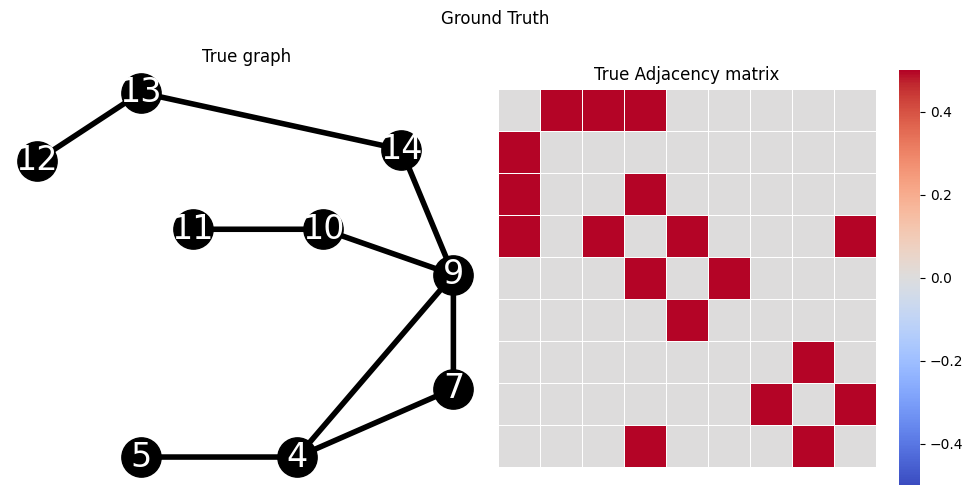

In [45]:
plot_ground_truth(
    A=novice_pmuds.true_network_graph,
    labels=novice_pmuds.labels,
    positions=novice_pmuds.graph_positions,
    annot=False,
    # save_path='case14-novice-network-graph.pdf',
);

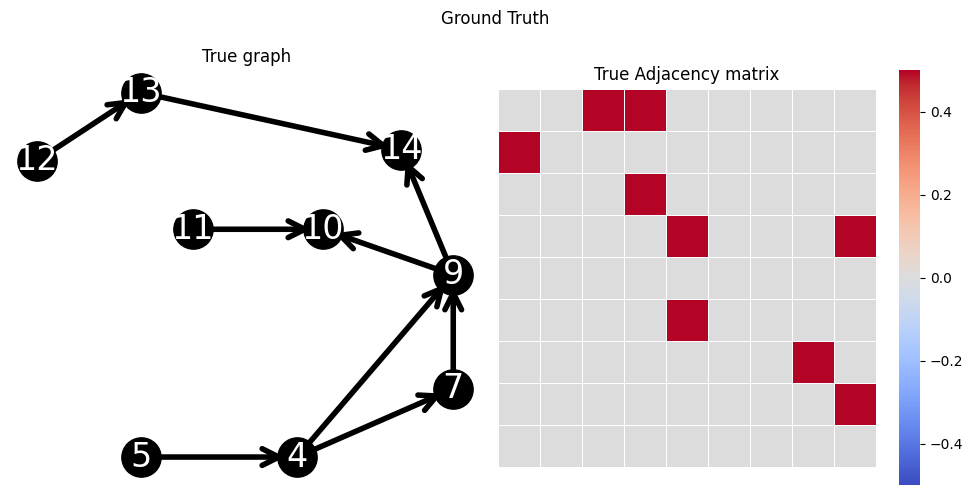

In [46]:
plot_ground_truth(
    A=novice_pmuds.true_flow_graph,
    labels=novice_pmuds.labels,
    positions=novice_pmuds.graph_positions,
    annot=False,
    directed=True,
    # save_path='case14-novice-flow-graph.pdf',
);

## Intermediate 

In [49]:
inter_pmuds = IntermediatePMUDataMatpowerCase14(load='80-120')
inter_pmuds.load_data()
print_pmuds_vars(inter_pmuds)
display(inter_pmuds.df)

inter_pmuds.build_graph_data()
display(inter_pmuds.graph_df)

nodes: 14
edges: 0
PMUs: 0
features:
['BUS1' 'BUS2' 'BUS3' 'BUS4' 'BUS5' 'BUS6' 'BUS7' 'BUS8' 'BUS9' 'BUS10'
 'BUS11' 'BUS12' 'BUS13' 'BUS14']
[2 2 2 2 2 2 2 2 2 2 2 2 2 2]


,Load Scales,BUS1_01_V_mag,BUS1_01_V_ang,BUS2_01_V_mag,BUS2_01_V_ang,BUS3_01_V_mag,BUS3_01_V_ang,BUS4_01_V_mag,BUS4_01_V_ang,BUS5_01_V_mag,...,BUS10_01_V_mag,BUS10_01_V_ang,BUS11_01_V_mag,BUS11_01_V_ang,BUS12_01_V_mag,BUS12_01_V_ang,BUS13_01_V_mag,BUS13_01_V_ang,BUS14_01_V_mag,BUS14_01_V_ang
0,0.800028,1.060000,0,1.041324,-0.065882,1.014407,-0.174033,1.017968,-0.139937,1.019692,...,1.046410,-0.207573,1.050342,-0.203100,1.048259,-0.206955,1.044554,-0.208155,1.033659,-0.220663
1,0.800036,1.060000,0,1.041324,-0.065883,1.014407,-0.174034,1.017968,-0.139938,1.019691,...,1.046410,-0.207575,1.050341,-0.203102,1.048259,-0.206957,1.044554,-0.208158,1.033658,-0.220665
2,0.800104,1.060000,0,1.041322,-0.065889,1.014404,-0.174050,1.017965,-0.139951,1.019689,...,1.046407,-0.207594,1.050339,-0.203120,1.048257,-0.206976,1.044552,-0.208177,1.033654,-0.220685
3,0.800146,1.060000,0,1.041322,-0.065892,1.014402,-0.174060,1.017963,-0.139959,1.019687,...,1.046405,-0.207606,1.050338,-0.203132,1.048257,-0.206988,1.044551,-0.208189,1.033652,-0.220698
4,0.800278,1.060000,0,1.041319,-0.065904,1.014396,-0.174091,1.017957,-0.139984,1.019682,...,1.046398,-0.207642,1.050334,-0.203167,1.048254,-0.207025,1.044547,-0.208226,1.033644,-0.220736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.199370,1.059999,0,1.040455,-0.071934,1.015763,-0.174224,1.013581,-0.152692,1.015623,...,1.032348,-0.229584,1.041897,-0.228344,1.041412,-0.239235,1.035368,-0.239931,1.014400,-0.252553
4996,1.199437,1.059999,0,1.040455,-0.071934,1.015762,-0.174225,1.013581,-0.152693,1.015623,...,1.032346,-0.229582,1.041896,-0.228342,1.041411,-0.239234,1.035366,-0.239930,1.014397,-0.252553
4997,1.199438,1.059999,0,1.040455,-0.071934,1.015762,-0.174225,1.013581,-0.152693,1.015623,...,1.032346,-0.229582,1.041896,-0.228342,1.041411,-0.239234,1.035366,-0.239930,1.014397,-0.252553
4998,1.199575,1.059999,0,1.040455,-0.071935,1.015762,-0.174226,1.013580,-0.152693,1.015623,...,1.032340,-0.229580,1.041893,-0.228339,1.041408,-0.239231,1.035363,-0.239927,1.014390,-0.252552


,01_V_mag_0.800028104260386,01_V_ang_0.800028104260386,01_V_mag_0.800035606393374,01_V_ang_0.800035606393374,01_V_mag_0.800104342068212,01_V_ang_0.800104342068212,01_V_mag_0.800146249505322,01_V_ang_0.800146249505322,01_V_mag_0.800278041588831,01_V_ang_0.800278041588831,...,01_V_mag_1.19937011660256,01_V_ang_1.19937011660256,01_V_mag_1.19943735531037,01_V_ang_1.19943735531037,01_V_mag_1.19943783891731,01_V_ang_1.19943783891731,01_V_mag_1.19957494223415,01_V_ang_1.19957494223415,01_V_mag_1.19986775178598,01_V_ang_1.19986775178598
BUS1,1.060000,0.000000,1.060000,0.000000,1.060000,0.000000,1.060000,0.000000,1.060000,0.000000,...,1.059999,0.000000,1.059999,0.000000,1.059999,0.000000,1.059999,0.000000,1.059999,0.000000
BUS2,1.041324,-0.065882,1.041324,-0.065883,1.041322,-0.065889,1.041322,-0.065892,1.041319,-0.065904,...,1.040455,-0.071934,1.040455,-0.071934,1.040455,-0.071934,1.040455,-0.071935,1.040455,-0.071938
BUS3,1.014407,-0.174033,1.014407,-0.174034,1.014404,-0.174050,1.014402,-0.174060,1.014396,-0.174091,...,1.015763,-0.174224,1.015762,-0.174225,1.015762,-0.174225,1.015762,-0.174226,1.015762,-0.174230
BUS4,1.017968,-0.139937,1.017968,-0.139938,1.017965,-0.139951,1.017963,-0.139959,1.017957,-0.139984,...,1.013581,-0.152692,1.013581,-0.152693,1.013581,-0.152693,1.013580,-0.152693,1.013579,-0.152695
BUS5,1.019692,-0.118632,1.019691,-0.118633,1.019689,-0.118644,1.019687,-0.118651,1.019682,-0.118672,...,1.015623,-0.131223,1.015623,-0.131223,1.015623,-0.131223,1.015623,-0.131223,1.015622,-0.131224
BUS6,1.059999,-0.194833,1.059999,-0.194835,1.059999,-0.194853,1.059999,-0.194864,1.059999,-0.194899,...,1.059994,-0.221765,1.059994,-0.221763,1.059994,-0.221763,1.059994,-0.221758,1.059994,-0.221747
BUS7,1.050657,-0.182966,1.050657,-0.182968,1.050654,-0.182984,1.050653,-0.182994,1.050648,-0.183026,...,1.042802,-0.180627,1.042801,-0.180622,1.042801,-0.180622,1.042798,-0.180612,1.042792,-0.180591
BUS8,1.059998,-0.182966,1.059998,-0.182968,1.059998,-0.182984,1.059998,-0.182994,1.059998,-0.183026,...,1.059995,-0.135918,1.059995,-0.135904,1.059995,-0.135904,1.059995,-0.135875,1.059995,-0.135813
BUS9,1.050744,-0.205384,1.050744,-0.205386,1.050740,-0.205404,1.050738,-0.205416,1.050732,-0.205451,...,1.037286,-0.223844,1.037284,-0.223842,1.037284,-0.223842,1.037278,-0.223839,1.037267,-0.223833
BUS10,1.046410,-0.207573,1.046410,-0.207575,1.046407,-0.207594,1.046405,-0.207606,1.046398,-0.207642,...,1.032348,-0.229584,1.032346,-0.229582,1.032346,-0.229582,1.032340,-0.229580,1.032329,-0.229574


In [50]:
check_flow_direction(inter_pmuds)

0.000 > -0.066:  0 -> 1 or 1 -> 2
0.000 > -0.119:  0 -> 4 or 1 -> 5
-0.066 > -0.174:  1 -> 2 or 2 -> 3
-0.066 > -0.140:  1 -> 3 or 2 -> 4
-0.066 > -0.119:  1 -> 4 or 2 -> 5
-0.140 > -0.174:  3 -> 2 or 4 -> 3
-0.140 > -0.183:  3 -> 6 or 4 -> 7
-0.140 > -0.205:  3 -> 8 or 4 -> 9
-0.119 > -0.140:  4 -> 3 or 5 -> 4
-0.119 > -0.195:  4 -> 5 or 5 -> 6
-0.195 > -0.203:  5 -> 10 or 6 -> 11
-0.195 > -0.207:  5 -> 11 or 6 -> 12
-0.195 > -0.208:  5 -> 12 or 6 -> 13
-0.183 > -0.205:  6 -> 8 or 7 -> 9
-0.183 > -0.183:  7 -> 6 or 8 -> 7
-0.205 > -0.208:  8 -> 9 or 9 -> 10
-0.205 > -0.221:  8 -> 13 or 9 -> 14
-0.203 > -0.208:  10 -> 9 or 11 -> 10
-0.207 > -0.208:  11 -> 12 or 12 -> 13
-0.208 > -0.221:  12 -> 13 or 13 -> 14
Incorrect Directions: 0


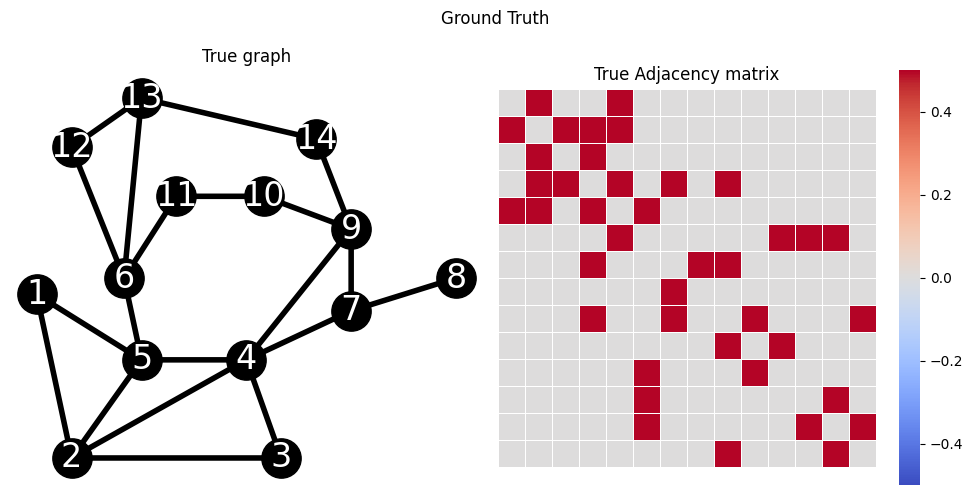

In [51]:
plot_ground_truth(
    A=inter_pmuds.true_network_graph,
    labels=inter_pmuds.labels,
    positions=inter_pmuds.graph_positions,
    annot=False,
    # save_path='case14-intermediate-network-graph.pdf',
);

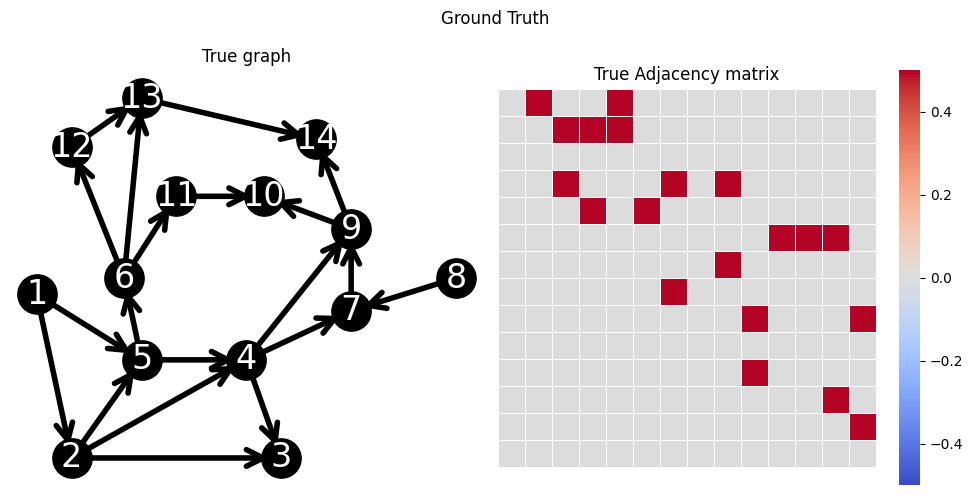

In [52]:
plot_ground_truth(
    A=inter_pmuds.true_flow_graph,
    labels=inter_pmuds.labels,
    positions=inter_pmuds.graph_positions,
    annot=False,
    directed=True,
    # save_path='case14-intermediate-flow-graph.pdf',
);